In [118]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import networkx as nx
from helpers import eig

# Exercise 3

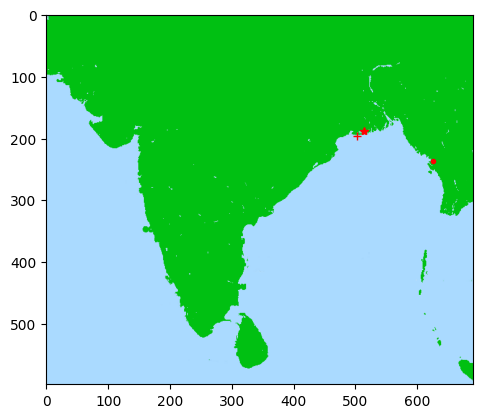

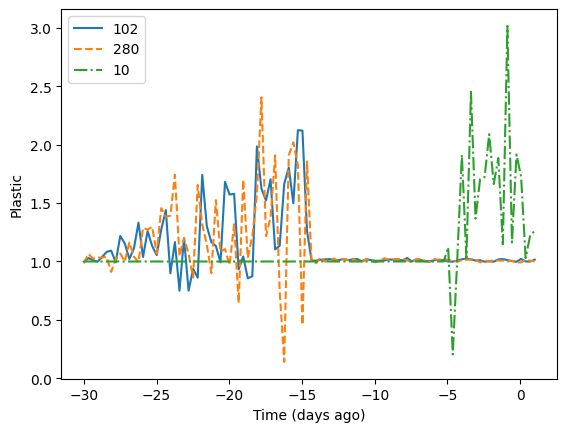

In [102]:
mat = scipy.io.loadmat('bengali_cleanup.mat')
A = plt.imread('bengali_map.png')

timeseries = mat['timeseries']
tv = mat['tv'][0]
x_coords = mat['x_coords']
y_coords = mat['y_coords']
jv = [101, 279, 9]  # Since Python index from 0 we subtract 1 on every element

plt.plot(y_coords[jv[0]],x_coords[jv[0]], 'r*', y_coords[jv[1]],x_coords[jv[1]], 'r+', y_coords[jv[2]],x_coords[jv[2]], 'r.')
plt.imshow(A)
plt.figure()
plt.plot(tv, timeseries[jv[0],:], '-', label = str(jv[0] + 1))
plt.plot(tv,timeseries[jv[1],:], '--', label = str(jv[1] + 1))
plt.plot(tv,timeseries[jv[2],:], '-.', label = str(jv[2] + 1))
plt.ylabel("Plastic")
plt.xlabel("Time (days ago)")
plt.legend()

### A)

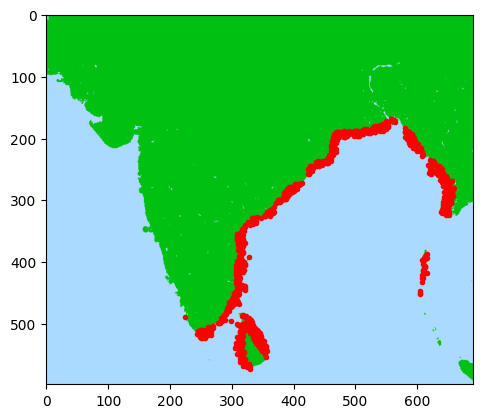

In [103]:
# Show all the stations on the map
plt.figure()
plt.imshow(A)
for i in range(937):
    plt.plot(y_coords[i],x_coords[i], 'r.')


### B) 

In [104]:
# Compute distance matrix in a vectorized way
Dist = np.sqrt(np.sum((timeseries[:, None, :] - timeseries[None, :, :])**2, axis=2))

print(Dist[279, 101])
print(Dist[101, 9])
print(Dist[279, 9])

3.348296297509076
4.610107624516747
4.839156486556748


### C)

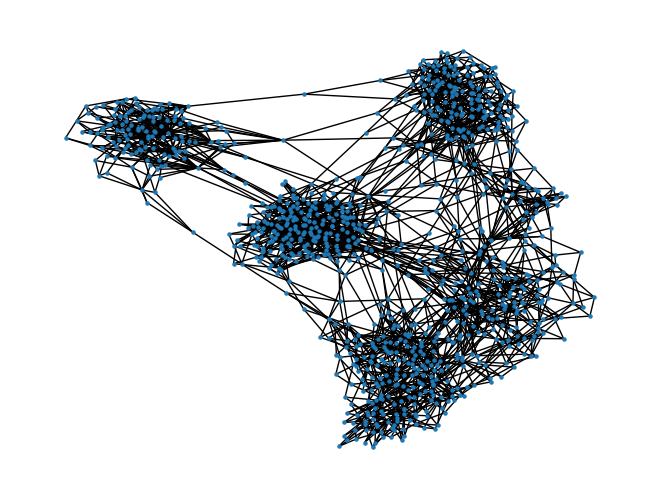

In [137]:
def knn(Dist, k):
    n = Dist.shape[0]
    W = np.zeros((n, n))
    knn_indices = np.argsort(Dist, axis=1)[:, :k+1]
    
    for i in range(n):
        W[i, knn_indices[i, 1:]] = 1
        W[knn_indices[i, 1:], i] = 1
    return W 
    

W = knn(Dist, 3)
G = nx.from_numpy_matrix(W)
nx.draw(G, node_size = 5)

D = np.diag(np.sum(W, axis = 1))
L = D - W
